# 3.12.29 Data Visualisation

### Data Visualisation

As the saying goes, a picture is worth a thousand words. Similarly, **a chart has the potential of conveying a tremendous amount of information** in the space of a postcard. Sometimes a simple table is the best solution to clearly show your data, however, more often than not, **patterns, trends and correlations are hidden** behind the thousands of data points that compose your dataset and might not otherwise be detected.

**Tables** are best used for comparison, composition, or relationship analysis when there are **only few variables and data points**. It would not make much sense to create a chart if the data can be easily interpreted from the table.

Use tables if:

- you need to compare or look up individual, precise values;
- the data has to communicate quantitative information, but not trends.

Use charts when you need to:

- compare aggregates or show trends;
- show a relationship between many values.

<img src="img/charts.png" width="600">

There are many different chart types, each of which has its strenghts and weaknesses and is more or less fit to be used in a certain context; let's see a few basic examples:

- **bar charts** are good for comparisons 
- **line charts** work better for trends 
- **scatter plots** are good for relationships and distributions

Python offers many **data visualisation libraries**, filled with lots of different features that allow you to create different types of highly customizable as well as interactive plots. `pandas` itself has some basic graphing functionalities that are based on the `matplotlib` graphing library, one of the most used and known plotting libraries in Python. Other great data visualisation libraries in the Python ecosystem are `plotly`, `seaborn`, `bokeh` and many more; check out [this web page](https://mode.com/blog/python-data-visualization-libraries/) for a list of more libraries and information on each one of them. 

### Matplotlib

Let's begin by importing all the necessary libraries; notice that we specifically import the `matplotlib.pyplot` module and give it a shortcut alias `plt`. Also, make sure to include and run the `%matplotlib inline` magic command to enable plotting in the current Notebook. 

Check out [this page](https://matplotlib.org/stable/tutorials/index.html) on the official Matplotlib website for a starting point to learn more about this library. 

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Let's start by creating a simple DataFrame with fictitious data, it will show two random numerical variables over the span of 10 years: 

In [3]:
df = pd.DataFrame({'year' : range(2011, 2021), 
                   'price_base' : np.random.randint(20, 40, 10), 
                   'price_full' : np.random.randint(50, 70, 10)})
df

,year,price_base,price_full
0,2011,27,55
1,2012,35,62
2,2013,28,67
3,2014,27,51
4,2015,30,61
5,2016,31,67
6,2017,21,57
7,2018,36,59
8,2019,29,56
9,2020,34,60


To begin with, let's **create a simple line chart**; to do that, we call the `plt.plot()` function and **pass it the x and y axes**, respectively: 

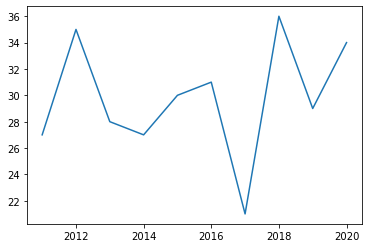

In [4]:
plt.plot(df['year'], df['price_base'])

Since our data comes from a DataFrame (that is, an object with labelled data), we can write directly the column names and specify the DataFrame name with the `data=` parameter: 

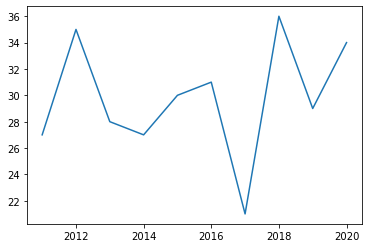

In [5]:
plt.plot('year', 'price_base', data=df)

#### Axes Labels

This output is what we were after, although it is a little barebone; let's **add the axes' labels**; to do this, we can just build on top of the existing plt object via the `.xlabel` and `.ylabel` methods. Notice also the `plt.show()` command at the end that shows the chart without printing Python's internal outputs: 

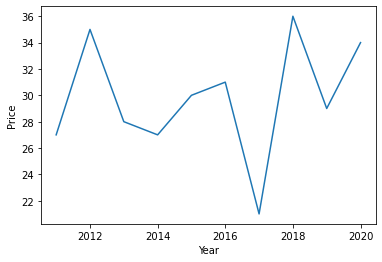

In [6]:
plt.plot('year', 'price_base', data=df)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#### Multiple Elements

If we wanted to **add a new line to the chart**, like `price_full`, we could simply add another `plt.plot()` function and basically write a new line on top of the existing chart:

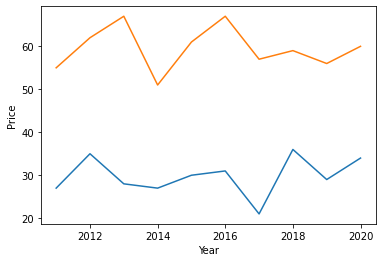

In [7]:
plt.plot('year', 'price_base', data=df)   # add first line
plt.plot('year', 'price_full', data=df)   # add second line
plt.xlabel('Year')   # add label on x-axis
plt.ylabel('Price')  # add label on y-axis
plt.show()   # show the chart

#### Legend

Now, you may have noticed that **there is no legend**, which means that someone seeing this for the first time wouldn't know the difference between the orange and the blue lines. Before adding the legend with `plt.legend()`, let's add a `label` parameter to each series and extend the y-axis with `plt.ylim()`: 

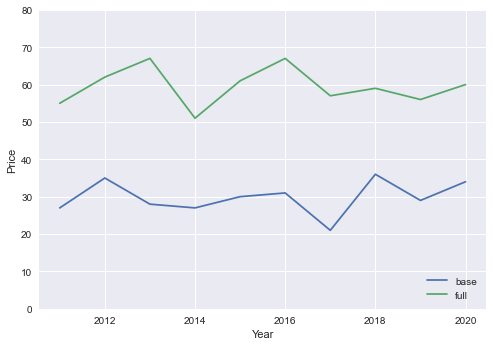

In [14]:
plt.plot('year', 'price_base', data=df, label='base')   # add a label to the series
plt.plot('year', 'price_full', data=df, label='full')   # add a label to the series
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc="lower right")   # add the legend and specify position
plt.ylim(0,80)   # extending the range of the y-axis 
plt.show()

#### Themes

The default theme of `matplotlib` is quite blunt but luckily **there are several built-in styles** that available and can be easily activated via the `plt.style.use()` function. Check out [this page](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) for a list and examples of all available themes.

In [10]:
plt.style.use('seaborn')

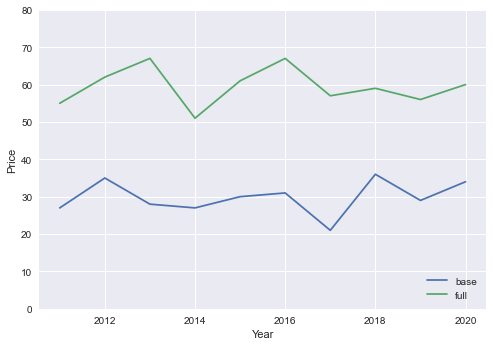

In [11]:
plt.plot('year', 'price_base', data=df, label='base')   # add a label to the series
plt.plot('year', 'price_full', data=df, label='full')   # add a label to the series
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc="lower right")   # add the legend and specify position
plt.ylim(0,80)   # extending the range of the y-axis 
plt.show()

#### Colours

You may have noticed that the **default colours** of the lines have changed, this is of course because we changed the theme, so let's see **how we can change the style of each individual line** element. Check out the *Notes* section of this [documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for more on formatting options. 

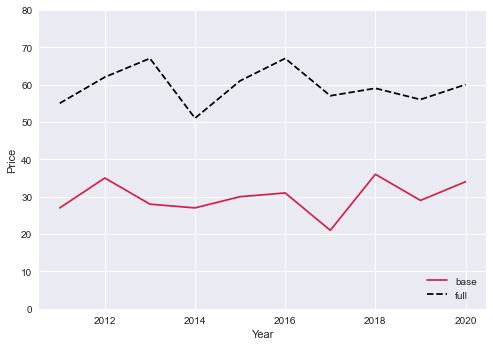

In [26]:
plt.plot('year', 'price_base', '#d1234c', data=df, label='base')   # change colour
plt.plot('year', 'price_full', '--k', data=df, label='full')   # change colour and line style
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc="lower right")   # add the legend and specify position
plt.ylim(0,80)   # extending the range of the y-axis 

plt.show()

#### More Chart Types

Instead of plotting two lines, we can specify to show a series of dots for the first column and a line for the second by replacing `plt.plot()` with `plt.scatter()`:

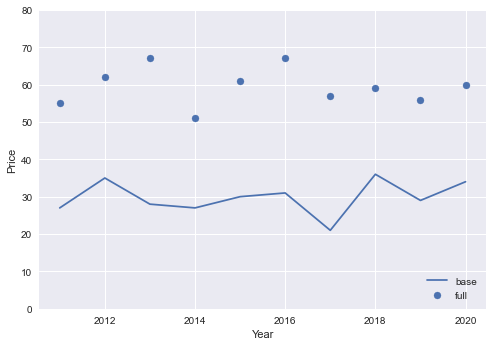

In [27]:
plt.plot('year', 'price_base', data=df, label='base')      # line chart
plt.scatter('year', 'price_full', data=df, label='full')   # scatterplot
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc="lower right")   # add the legend and specify position
plt.ylim(0,80)   # extending the range of the y-axis 

plt.show()

Let's load the `iris` dataset which is a bit more structured and complex:

In [28]:
iris = pd.read_csv("data/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Bar Chart**

If we want to **compare** the average `petal.length` across each Iris `variety`, we can **use a bar chart**, but first we need to group the data accordingly and then we can plot it using the `plt.bar()` function. 

In [29]:
iris.groupby('variety', as_index=False)['petal.length'].mean()

,variety,petal.length
0,Setosa,1.462
1,Versicolor,4.260
2,Virginica,5.552


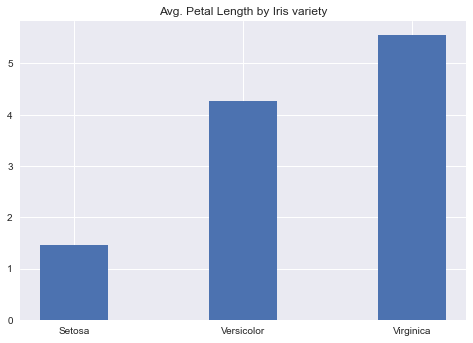

In [31]:
plt.bar('variety', 'petal.length', width=0.4, data=iris.groupby('variety', as_index=False)['petal.length'].mean())
plt.title('Avg. Petal Length by Iris variety')   # to add a title
plt.show()

If, instead, you want to generate a **horizontal bar chart**, just use the `plt.barh` function: 

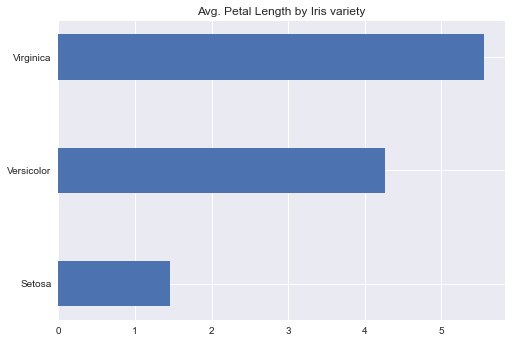

In [32]:
plt.barh('variety', 'petal.length', height=0.4, data=iris.groupby('variety', as_index=False)['petal.length'].mean())
plt.title('Avg. Petal Length by Iris variety')   # to add a title
plt.show()

**Scatterplot**

We can use the `plt.scatter()` function to show the **relationship** between the `petal.length` and the `petal.width`:

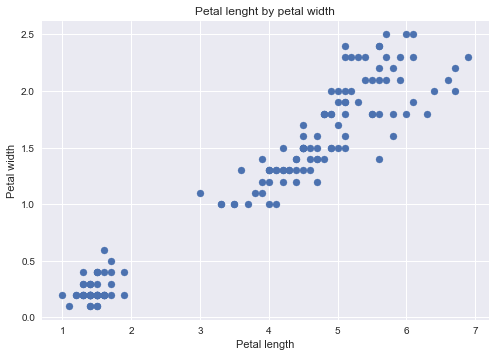

In [33]:
plt.scatter('petal.length', 'petal.width', data=iris)
plt.title('Petal lenght by petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

Now, as you can see from the code below, if we now wanted to differentiate the Iris varaieties using three different colours, it wouldn't be such an easy and straightforward task in `matplotlib`: 

Text(0, 0.5, 'petal.width')

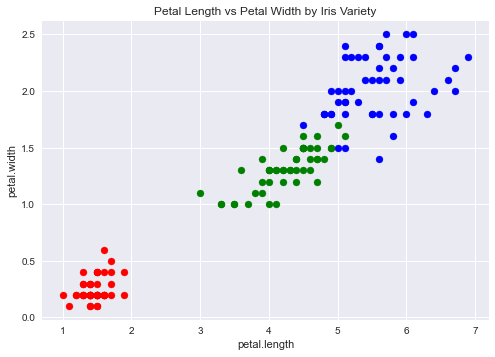

In [34]:
# create color dictionary
colors = {'Setosa':'r', 'Versicolor':'g', 'Virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['petal.length'])):
    ax.scatter(iris['petal.length'][i], iris['petal.width'][i],color=colors[iris['variety'][i]])
# set a title and labels
ax.set_title('Petal Length vs Petal Width by Iris Variety')
ax.set_xlabel('petal.length')
ax.set_ylabel('petal.width')

As you can see, we were able to do it, but we had to cycle through each data point and "paint" each individual value on our canvas. Luckily there are other Python libraries that allow us to plot the data that comes from structured DataFrames like ours in a much simpler way. 

One of them is `Seaborn`, let's see how it works. 

### Seaborn

Seaborn is a Python **data visualization library** which is based on Matplotlib. It can create graphs in one line that would take multiple tens of lines in Matplotlib. Its default themes are **visually appealing** and it **integrates well with Pandas dataframes**. 

Check out [this page](https://seaborn.pydata.org/tutorial.html) on the official Seaborn website for a starting point to learn more about this library. 

The Seaborn functions you can use to plot charts are divided into three generic-purpose modules, called **figure-level** functions (`sns.relplot()`, `sns.displot()` and `sns.catplot()`), which can be used to create most of the plots that you'll need. Within each of these modules, you can find more "chart-specific" functions, called **axex-level** functions. You can find more detailed information about figure- and axes-level functions in this [official tutorial](https://seaborn.pydata.org/tutorial/function_overview.html) as well as in this [medium article](https://towardsdatascience.com/a-major-seaborn-plotting-tip-i-wish-i-had-learned-earlier-d8209ad0a20e). 

The following picture gives a clear representation of the three macro-modules and their spcialised sub-functions. 

<img src="img/seaborn-charts.png" width="600">

Make sure to check out this [gallery page](https://seaborn.pydata.org/examples/index.html) containing examples of the different charts you can plot using this library.

In [35]:
# import the library as sns
import matplotlib.pyplot as plt
import seaborn as sns

#### Scatter Plot

This is how you **create a scatterplot** in Seaborn (notice how it **automatically generated labels** on the x and y axes):

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

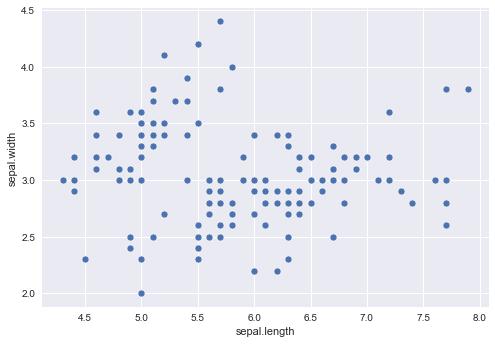

In [36]:
sns.scatterplot(x='sepal.length', y='sepal.width', data=iris)

And this is how you **add the colour** based on the type of `variety`; as you can see, we were able to achieve in one line what required several lines and a for loop in Matplotlib (and it also **generated a legend** automatically): 

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

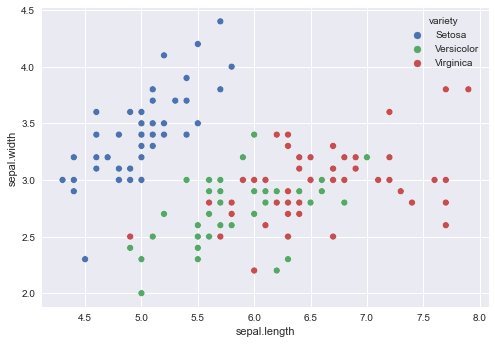

In [37]:
sns.scatterplot(x='sepal.length', y='sepal.width', hue='variety', data=iris)

#### Seaborn Datasets

Seaborn comes pre-loaded with some example datasets; you can see a list of all of them via the `sns.get_dataset_names()` function. If you want to load one of them, use the `sns.load_dataset()` function instead.

In [38]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Let's load the `flights` dataset: 

In [39]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


#### Line Chart

Let's say we're interested in looking how the number of passengers has changed across the years, we can use the `sns.lieplot()` [function](https://seaborn.pydata.org/generated/seaborn.lineplot.html), which plots a **line chart** and requires the usual x and y variables as well as the dataset as inputs:

<AxesSubplot:xlabel='year', ylabel='passengers'>

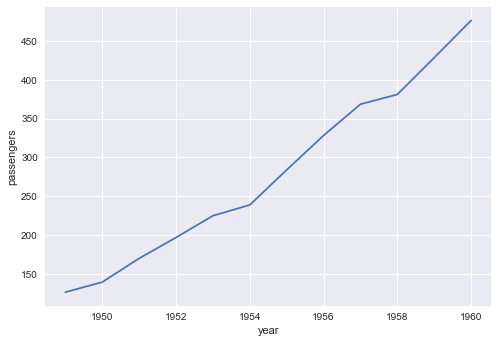

In [41]:
sns.lineplot(x='year', y='passengers', data=flights, ci=None)

In Seaborn it's very easy to introduce a new dimension to the plot. Let's say we want to **break down the line plot above by month**, so to show a new line for each month of the year; this can be easily achieved by assigning the `month` variable to the `hue` parameter: 

<AxesSubplot:xlabel='year', ylabel='passengers'>

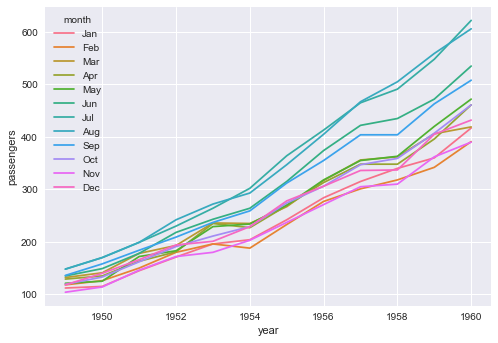

In [42]:
sns.lineplot(x='year', y='passengers', hue='month', data=flights)

#### Bar Chart

A **bar chart** can be created using the `sns.barplot()` function:

<AxesSubplot:xlabel='month', ylabel='passengers'>

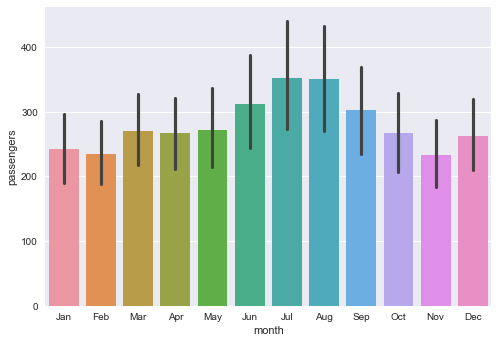

In [43]:
sns.barplot(x='month', y='passengers', data=flights)

By default, Seaborn adds *95% confidnce interval bars* (don't worry about them for now) and *assigns a different colour to each bar*. We're not interested in confidence bars and painting each bar of a different color adds no information to the chart and distracts the attention from the actual data, so let' remove the confidence bars with the parameter `ci=None` and let's assign a cyan colour to all bars via the `color='c'` parameter. 

<AxesSubplot:xlabel='month', ylabel='passengers'>

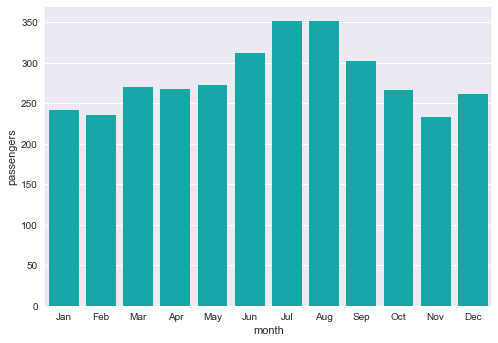

In [44]:
sns.barplot(x='month', y='passengers', data=flights, ci=None, color='c')

To change the orientation of the chart and thus obtain a **horizontal bar chart**, you can simply swap the variable that you include in the x and y parameters of the `sns.barplot()` function: 

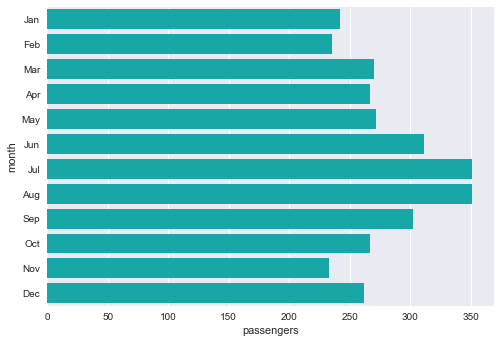

In [45]:
ax = sns.barplot(x='passengers', y='month', data=flights, ci=None, color='c')
plt.show()

If we just want to do a **count of the number of observations** in each category of a certain variable and visualise it with a bar chart, we can use the `sns.countplot()` function. Let's load the `tips` dataset to show how many tables with 1, 2, 3, ... seats (the table size is shown in the `size` column) there are in the dataset: 

In [46]:
sns.load_dataset('tips').head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Notice how we can specify the title, xlabel and ylabel via the `.set()` method. Also, when displaying a chart, you can omit Seaborn's output comments using `plt.show()` (but you neet to have run `import matplotlib.pyplot as plt` first). 

<AxesSubplot:xlabel='count', ylabel='size'>

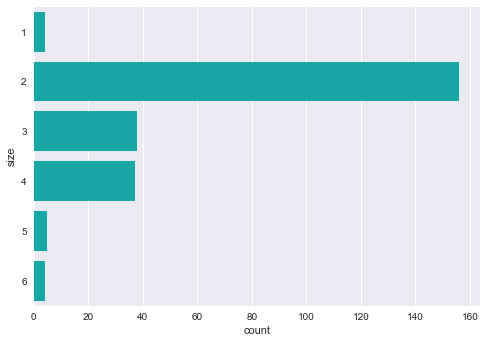

In [47]:
sns.countplot(y='size', data=sns.load_dataset('tips'), color='c')

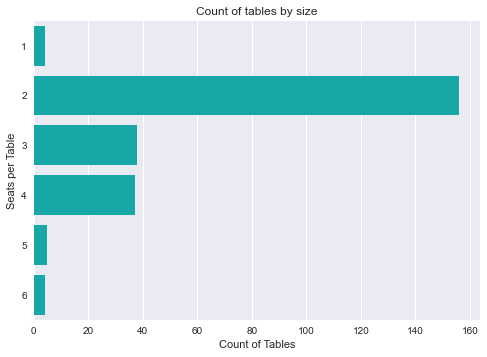

In [51]:
sns.countplot(y='size', data=sns.load_dataset('tips'), color='c').set(title='Count of tables by size',
                                                                      xlabel='Count of Tables', 
                                                                      ylabel='Seats per Table')
plt.show()